In [1]:
import numpy as np
from ReplayBuffer import ReplayBuffer
from TD3 import TD3
from Critic import Critic
from Actor import Actor
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler


In [3]:
state_dim = 6
action_dim = 6
max_time = 10

In [3]:
rb = ReplayBuffer(state_dim,action_dim)

In [4]:
# policy = TD3(state_dim,action_dim,max_time,100,100)

In [5]:
act = Actor(state_dim,action_dim,max_time,0.7,5).to('cpu')

In [6]:
for i in range(100):
    state = np.arange(6)
    action = np.arange(6)
    nxt_state = np.arange(6)
    reward = np.random.uniform(1000)
    rb.store(state,action,nxt_state,reward)

In [7]:
state, action, nxt_state, reward = rb.sample(32)

In [8]:
state[0]

array([0., 1., 2., 3., 4., 5.])

In [9]:
act(torch.Tensor(state[0]))

tensor([0.2800, 0.0284, 0.0127, 0.4628, 0.0867, 0.0100],
       grad_fn=<AbsBackward0>)


tensor([[2.8001, 0.0853, 0.1138, 0.0089, 2.3142, 0.4333, 0.0501]],
       grad_fn=<CatBackward0>)

In [7]:
policy.train(rb,10)

In [9]:
action = np.random.rand(19)

In [13]:
T_th = [np.abs(10 * action[0])]
coef = 500 * action[1:]
action = np.concatenate((T_th,coef))

In [14]:
action

array([  3.3242602 , 362.18142335, 238.05038436, 137.94959479,
       305.62622241,  11.29523593, 189.72405898, 164.5146315 ,
       319.40553002, 409.12145127, 226.30330379, 147.13353829,
        41.28369998, 465.91540901, 111.55983097, 199.7546455 ,
        86.58571038, 116.12232831, 317.70933147])

In [64]:
from ReplayBuffer import ReplayBuffer
import os
import matplotlib.pyplot as plt


In [65]:
state_dim = 6
action_dim = 6
max_time = 10

In [66]:
rb = ReplayBuffer(state_dim,action_dim,'../../../../../../ReplayBuffer.csv')

In [67]:
data = rb.dump()

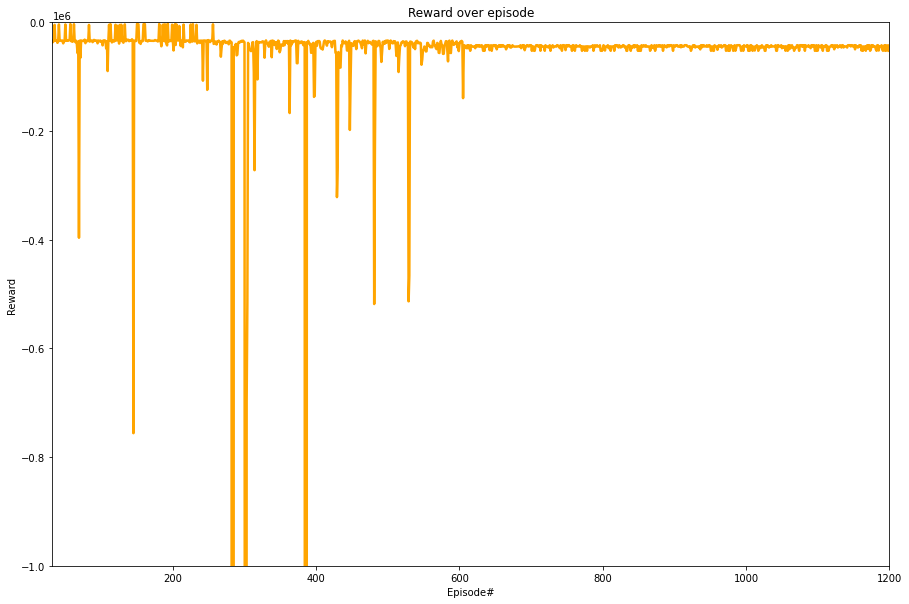

In [71]:
plt.figure(figsize=(15,10))
plt.title("Reward over episode")
plt.xlim((32,len(data['reward'])))
plt.ylim((-1000000,0))
plt.xlabel("Episode#")
plt.ylabel("Reward")
plt.plot(data['reward'], color="orange", linewidth=2.5)
plt.savefig('test.jpg')
plt.show()

# Generate jump end position area

In [72]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [75]:
zero = np.array([0,0,0])
targetCoM = np.array([1.5,1.3,0.5])

In [76]:
x,y,z = zip(zero,targetCoM)

In [77]:
# fx,fy,fz = zip(list(max_CoM_f))

In [78]:
def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    return az, el, r

In [79]:
def sph2cart(az, el, r):
    rcos_theta = r * np.cos(el)
    x = rcos_theta * np.cos(az)
    y = rcos_theta * np.sin(az)
    z = r * np.sin(el)
    return x, y, z

In [80]:
az, el, r = cart2sph(targetCoM[0],targetCoM[1],targetCoM[2])

In [81]:
arcx = []
arcy = []
arcz = []
for i in np.arange(0,np.pi/2,0.01):
    x1,y1,z1 = sph2cart(az,i,0.4)
    arcx.append(x1)
    arcy.append(y1)    
    arcz.append(z1)    

In [82]:
a = np.random.rand(10)

In [83]:
el = (np.pi/2)*(a.reshape(-1,1))

In [84]:
r = 0.3*(a.reshape(-1,1))+0.1

In [85]:
state = np.random.rand(10,3)
state

array([[0.65606189, 0.13104571, 0.89029166],
       [0.96032439, 0.2808205 , 0.66803937],
       [0.40791815, 0.24070114, 0.03445158],
       [0.22763933, 0.01723158, 0.29362785],
       [0.23945627, 0.87500339, 0.01435145],
       [0.13840848, 0.25767044, 0.49508562],
       [0.59999541, 0.0391589 , 0.50691885],
       [0.82265675, 0.64709517, 0.66363978],
       [0.3132897 , 0.17976269, 0.45569092],
       [0.21297668, 0.06376436, 0.94861028]])

In [88]:
az, _ , _ = cart2sph(state[:,0].reshape(-1,1),state[:,1].reshape(-1,1),state[:,2].reshape(-1,1))

In [89]:
az = np.full((10,1),az)

In [90]:
rx,ry,rz = sph2cart(az,el,r)

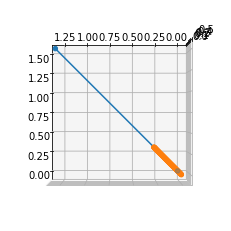

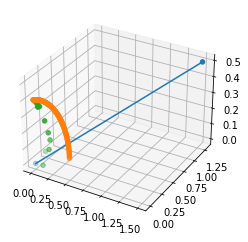

In [91]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=180, elev=90)
ax.scatter(x,y,z)
ax.plot(x,y,z)
ax.scatter(arcx,arcy,arcz)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.view_init(azim=180, elev=90)
ax.scatter(x,y,z)
ax.plot(x,y,z)
ax.scatter(arcx,arcy,arcz)
ax.scatter(rx,ry,rz)

In [92]:
np.random.uniform(-1,1,10)

array([ 0.81736765, -0.48906118,  0.6949633 , -0.84204968,  0.46444178,
       -0.64507713, -0.15785016, -0.8024703 , -0.69038788, -0.03985923])

In [1]:
import numpy as np
import torch
import torch.nn as nn
import time

In [2]:
import torch
import torch.nn as nn
import numpy as np
from utils import *

class Actor(nn.Module):
    def __init__(self,
                 state_dim,
                 action_dim,
                 max_time,
                 min_time,
                 max_velocity,
                 max_extension,
                 min_extension,
                 min_phi,
                 layer_dim=256):

        super(Actor, self).__init__()
        self.action_dim = action_dim
        self.max_time = max_time
        self.min_time = min_time
        self.max_velocity = max_velocity
        self.max_extension = max_extension
        self.min_extension = min_extension
        self.min_phi = min_phi

        self.actor_model = nn.Sequential(
            nn.Linear(state_dim, layer_dim),
            nn.ReLU(),
            nn.Linear(layer_dim, layer_dim),
            nn.ReLU(),
            nn.Linear(layer_dim, action_dim),
            nn.Tanh()
        )

    def forward(self, state):
        tmp_action = self.actor_model(state)
        action_shape = list(tmp_action.shape)[0]
        action_dim = len(tmp_action.shape)

        if action_dim > 1:
            theta, _, _ = cart2sph(state[:, 3].reshape(-1, 1), state[:, 4].reshape(-1, 1), state[:, 5].reshape(-1, 1))
            theta = np.full((action_shape, 1), theta)

            T_th = (self.max_time - self.min_time) * (0.5*(tmp_action[:, 0]+1).reshape(-1, 1)) + self.min_time

            phi =  (np.pi/2 - self.min_phi) * (0.5*(tmp_action[:, 1]+1).reshape(-1, 1)) + self.min_phi
            r = (self.max_extension - self.min_extension) * (0.5*(tmp_action[:, 2]+1).reshape(-1, 1)) + self.min_extension

            ComF_x, ComF_y, ComF_z = sph2cart(theta, phi.detach().numpy(), r.detach().numpy())
            ComF_x = torch.Tensor(ComF_x)
            ComF_y = torch.Tensor(ComF_y)
            ComF_z = torch.Tensor(ComF_z)

            phi_d = (0.5*(tmp_action[:, 3]+1).reshape(-1, 1)) * (np.pi / 2)
            r_d = (0.5*(tmp_action[:, 4]+1).reshape(-1, 1)) * self.max_velocity

            ComFd_x, ComFd_y, ComFd_z = sph2cart(theta, phi_d.detach().numpy(), r_d.detach().numpy())
            ComFd_x = torch.Tensor(ComFd_x)
            ComFd_y = torch.Tensor(ComFd_y)
            ComFd_z = torch.Tensor(ComFd_z)

            action = torch.reshape(torch.cat((T_th, ComF_x, ComF_y, ComF_z, ComFd_x, ComFd_y, ComFd_z), axis=1),
                                   [action_shape, self.action_dim + 2])
        else:
            theta, _, _ = cart2sph(state[3], state[4], state[5])

            T_th = torch.flatten( (self.max_time - self.min_time) * (0.5*(tmp_action[0]+1)) + self.min_time)

            phi = torch.flatten((np.pi/2 - self.min_phi) * (0.5*(tmp_action[1]+1) + self.min_phi))
            r = torch.flatten((self.max_extension - self.min_extension) * (0.5*(tmp_action[2]+1)) + self.min_extension)

            ComF_x, ComF_y, ComF_z = sph2cart(theta.detach().numpy(), phi.detach().numpy(), r.detach().numpy())
            ComF_x = torch.Tensor(ComF_x)
            ComF_y = torch.Tensor(ComF_y)
            ComF_z = torch.Tensor(ComF_z)

            phi_d = torch.flatten((0.5*(tmp_action[3]+1))* (np.pi / 2))
            r_d = torch.flatten((0.5*(tmp_action[4]+1) * self.max_velocity))

            ComFd_x, ComFd_y, ComFd_z = sph2cart(theta.detach().numpy(), phi_d.detach().numpy(), r_d.detach().numpy())
            ComFd_x = torch.Tensor(ComFd_x)
            ComFd_y = torch.Tensor(ComFd_y)
            ComFd_z = torch.Tensor(ComFd_z)

            action = torch.cat((T_th[None, :], ComF_x[None, :],ComF_y[None, :],ComF_z[None, :], ComFd_x[None, :], ComFd_y[None, :], ComFd_z[None, :]),
                               axis=1)

        return action

In [10]:
state_dim = 6
action_dim = 7-2
max_time= 2
min_time=0.1
max_velocity = 0.5
max_extrension = 0.32
min_extension = 0.06
min_phi = np.pi/6

In [11]:
model = Actor(state_dim, action_dim, max_time, min_time, max_velocity, max_extrension, min_extension, min_phi)

In [21]:
state = torch.Tensor([[0,0,.25,0.5,0,0.25],[0,0,.25,0.5,0,0.25],[0,0,.25,0.5,0,0.25]])

In [22]:
state

tensor([[0.0000, 0.0000, 0.2500, 0.5000, 0.0000, 0.2500],
        [0.0000, 0.0000, 0.2500, 0.5000, 0.0000, 0.2500],
        [0.0000, 0.0000, 0.2500, 0.5000, 0.0000, 0.2500]])

In [23]:
start = time.time()
action = model(state)
end = time.time()

In [24]:
print("Model exec time:", end-start)

Model exec time: 0.022974252700805664


In [25]:
print(action)

tensor([[1.0484, 0.0873, 0.0000, 0.1625, 0.1916, 0.0000, 0.1678],
        [1.0484, 0.0873, 0.0000, 0.1625, 0.1916, 0.0000, 0.1678],
        [1.0484, 0.0873, 0.0000, 0.1625, 0.1916, 0.0000, 0.1678]],
       grad_fn=<ReshapeAliasBackward0>)


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Create subplots

figure, ax = plt.subplots(figsize=(4,5))

# Data Coordinates

x = np.linspace(0, 20, 80)
y = np.sin(x)

# GUI

plt.ion()

#  Plot

plot1, = ax.plot(x, y)

# Labels

plt.xlabel("X-Axis",fontsize=18)
plt.ylabel("Y-Axis",fontsize=18)

for value in range(150):
    update_y_value = np.sin(x-2.5*value)
    
    plot1.set_xdata(x)
    plot1.set_ydata(update_y_value)
    
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.1)


# Display

plt.show()